In [1]:
import sys,  time
import ipywidgets as widget
from IPython.display import display
import numpy as np
import cv2
from PIL import Image as PIL_Image
from io import BytesIO
cv2.startWindowThread()
def img_to_png(ima, cvt=None):
    if cvt:
        ima = cv2.cvtColor(ima, cvt)
    im = PIL_Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    return bio.getvalue()

Segmentation

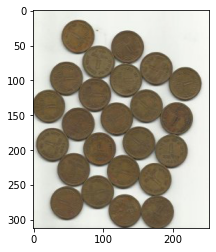

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
img = cv2.imread("img/water_coins.jpg")
#PIL_Image.fromarray(img[..., ::-1])
plt.imshow(img[..., ::-1])

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers0 = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers0+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

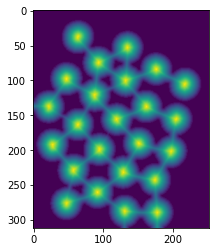

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(dist_transform)

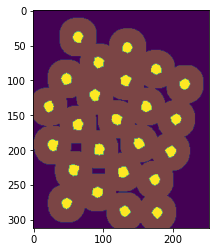

In [20]:
plt.imshow(sure_fg)
plt.imshow(sure_bg, alpha=0.3)

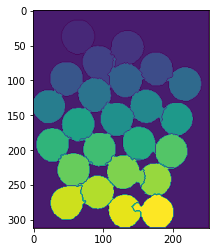

In [6]:
plt.imshow(markers)